In [1]:
import pandas as pd
import seaborn as sns
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
%matplotlib inline
import numpy as np

## Correlacion, todas las preguntas

In [2]:
datos = pd.read_excel('Encuesta para tesis terminada_edit.xlsx')

In [3]:
categorical_features=identify_nominal_columns(datos)
# categorical_features

In [4]:
selected_column= datos[categorical_features]
categorical_df = selected_column.copy()

In [5]:
for column in categorical_df:
    categorical_df[column] = pd.Categorical(categorical_df[column]).codes

In [6]:
corr_matrix = categorical_df.corr()

<AxesSubplot: >

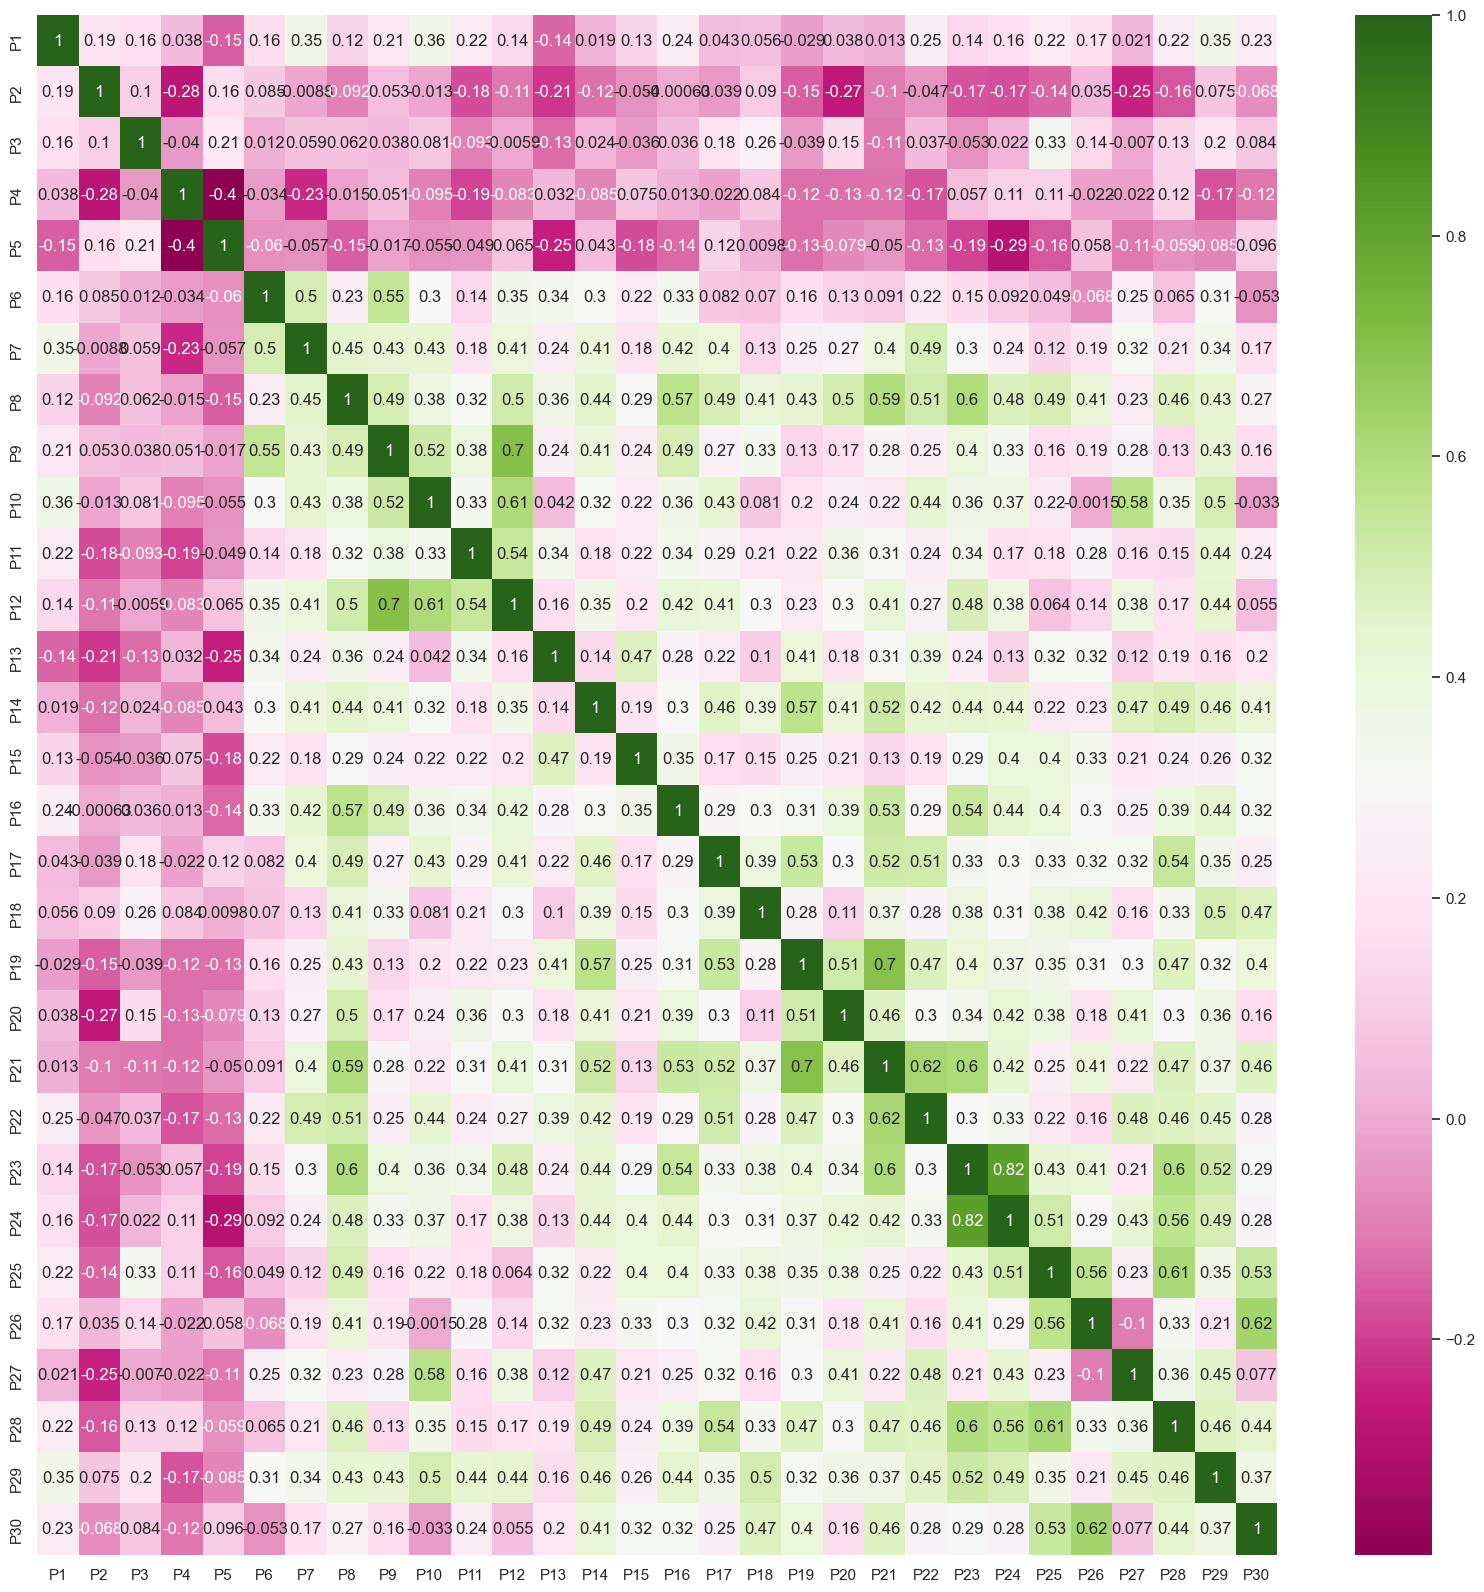

In [7]:
sns.set (rc = {"figure.figsize" :( 20 , 20 )})
sns.heatmap(corr_matrix, cmap="PiYG", annot=True)

## Correlación, valores sobre 0,5 0 bajo -0,5

In [8]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(np.abs(upper_tri[column]) > 0.5)]


/var/folders/p8/_dv73cns3qx8zr92hd_pnstw0000gn/T/ipykernel_46605/549096908.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [9]:
corr_matrix_filter=corr_matrix.drop(to_drop, axis=1)

<AxesSubplot: >

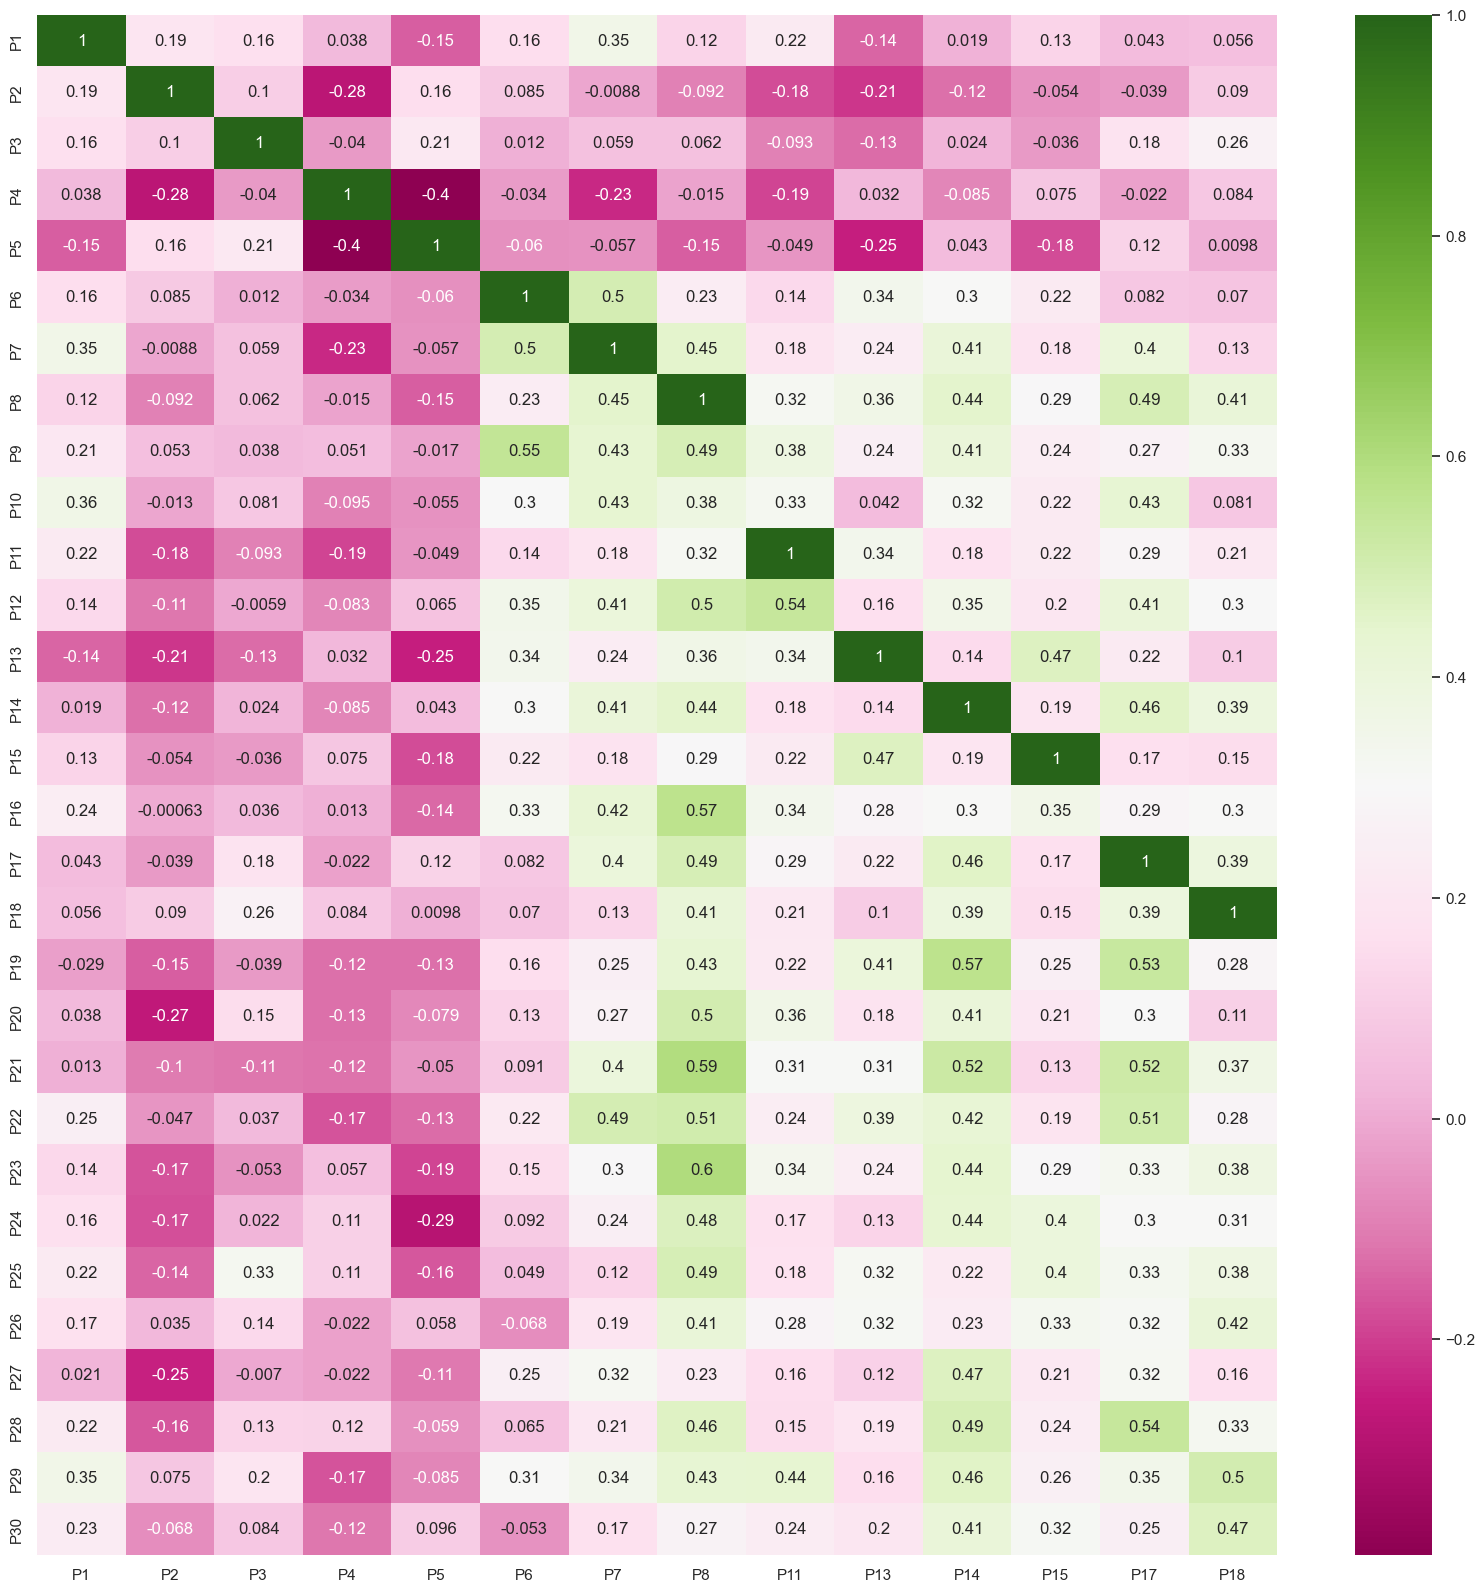

In [10]:
sns.set (rc = {"figure.figsize" :( 20 , 20 )})
sns.heatmap(corr_matrix_filter, cmap="PiYG", annot=True)

In [ ]:
filteredDf = corr_matrix[((corr_matrix >= .5) | (corr_matrix <= -.5)) & (corr_matrix !=1.000)]